# Examples

## General Setup

Models include factors and returns.  Factors can be traded or non-traded.  Common examples of traded assets include the excess return on the market and the size and value factors.  Examples of non-traded assets include macroeconomic shocks and measures of uncertainty.  

Models are tested using a set of test portfolios. Test portfolios are often excess returns although they do not need to be. 

## Import data

The data used comes from Ken French's [website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and includes 4 factor returns, the excess market, the size factor, the value factor and the momentum factor.  The available test portfolios include the 12 industry portfolios, a subset of the size-value two way sort, and a subset of the size-momentum two way sort. 

In [1]:
from linearmodels.datasets import french
data = french.load()
print(french.DESCR)


Data from Ken French's data library
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

dates    Year and Month of Return
MktRF    Market Factor
SMB      Size Factor
HML      Value Factor
Mom      Momentum Factor
RF       Risk-free rate
NoDur    Industry: Non-durables
Durbl    Industry: Durables
Manuf    Industry: Manufacturing
Enrgy    Industry: Energy
Chems    Industry: Chemicals
BusEq    Industry: Business Equipment
Telcm    Industry: Telecoms
Utils    Industry: Utilities
Shops    Industry: Retail
Hlth     Industry: Health care
Money    Industry: Finance
Other    Industry: Other
S1V1     Small firms, low value
S1V3     Small firms, medium value
S1V5     Small firms, high value
S3V1     Size 3, value 1
S3V3     Size 3, value 3
S3V5     Size 3, value 5
S5V1     Large firms, Low value
S5V3     Large firms, medium value
S5V5     Large Firms, High value
S1M1     Small firms, losers
S1M3     Small firms, neutral
S1M5     Small firms, winners
S3M1     Size 3, momentu

## Transform the portfolios to be excesses

Subtract the risk-free rate from the test portfolios since these are not zero-investment.

In [2]:
data.iloc[:,6:] = data.iloc[:,6:].values - data[['RF']].values

## 1-Step Estimation using Seemingly Unrelated Regression (SUR)

When the factors are traded assets, they must price themselves, and so the observed factor returns can be used to consistently estimate the expected factor returns.  This also allows a set of seemingly unrelated regressions where each test portfolio is regressed on the factors and a constant to estimate factor loadings and $\alpha$s. 

Note that when using this type of model, it is essential that the test portfolios are excess returns. This is not a requirement of the other factor model estimators. 

This specification is a CAP-M since only the market is included.  The J-statistic tests whether all model $\alpha$s are 0.  The CAP-M is unsurprisingly unable to price the test portfolios.

In [3]:
from linearmodels.asset_pricing import TradedFactorModel
portfolios = data[['S1V1','S1V3','S1V5','S3V1','S3V3','S3V5','S5V1','S5V3','S5V5']]
factors = data[['MktRF']]
mod = TradedFactorModel(portfolios, factors)
res = mod.fit()
print(res)

                      TradedFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.6910
No. Factors:                          1   J-statistic:                    70.034
No. Observations:                   819   P-value                         0.0000
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(9)
Time:                          10:33:53                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0065     0.0015     4.3553     0.0000      0.0035      0.0094

Covariance estimator:
Heteroskedast

The factor set is expanded to include both the size and the value factors.

While the extra factors lower the J statistic and increases the $R^2$, the model is still easily rejected.

In [4]:
factors = data[['MktRF', 'SMB', 'HML']]
mod = TradedFactorModel(portfolios, factors)
res = mod.fit()
print(res)

                      TradedFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.8971
No. Factors:                          3   J-statistic:                    53.271
No. Observations:                   819   P-value                         0.0000
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(9)
Time:                          10:33:53                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0065     0.0015     4.3553     0.0000      0.0035      0.0094
SMB            0.0016     0.0010    

Changing the test portfolios to include only the industry portfolios does not allow factors to price the assets.

In [5]:
indu = ['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'Chems', 'BusEq', 
        'Telcm', 'Utils', 'Shops',  'Hlth', 'Money',  'Other']
portfolios = data[indu]
mod = TradedFactorModel(portfolios, factors)
res = mod.fit()
print(res)

                      TradedFactorModel Estimation Summary                      
No. Test Portfolios:                 12   R-squared:                      0.7118
No. Factors:                          3   J-statistic:                    61.617
No. Observations:                   819   P-value                         0.0000
Date:                  Tue, Feb 04 2020   Distribution:                 chi2(12)
Time:                          10:33:53                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0065     0.0015     4.3553     0.0000      0.0035      0.0094
SMB            0.0016     0.0010    

The estimated factor loadings ($\beta$s) can be displayed using the `betas` property. There is reasonable dispersion in the factor loadings for all of the factors, except possibly the market which are all close to unity.

In [6]:
print(res.betas)

          MktRF       SMB       HML
NoDur  0.803334 -0.029383  0.080556
Durbl  1.176659  0.104124  0.466510
Manuf  1.129601  0.094600  0.197135
Enrgy  0.913425 -0.234012  0.264609
Chems  0.970844 -0.179466  0.092021
BusEq  1.152119  0.182299 -0.543462
Telcm  0.782811 -0.158395  0.044042
Utils  0.605203 -0.175549  0.260051
Shops  0.942997  0.135802 -0.010064
Hlth   0.864135 -0.213336 -0.315180
Money  1.112368 -0.053364  0.378365
Other  1.109851  0.304442  0.237830


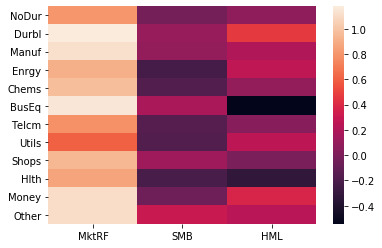

In [7]:
import seaborn as sns
%matplotlib inline
sns.heatmap(res.betas)

Similarly the $\alpha$s can be displayed.  These are monthly returns, and so scaling by 12 shows annualized returns. Healthcare has the largest pricing error. 

In [8]:
12 * res.alphas

NoDur    0.023360
Durbl   -0.030919
Manuf   -0.010643
Enrgy    0.012009
Chems    0.002783
BusEq    0.024215
Telcm    0.009726
Utils    0.017078
Shops    0.009952
Hlth     0.050760
Money   -0.015197
Other   -0.033345
Name: alpha, dtype: float64

## 2-Step Estimation

When one of more factors are not returns on traded assets, it is necessary to use a two-step procedure (or GMM).  In the 2-step estimator, the first estimates factor loadings and the second uses the factor loadings to estimate the risk premia.  

Here all four factors are used to attempt to price the size-momentum portfolios.

In [9]:
from linearmodels.asset_pricing import LinearFactorModel
factors = data[['MktRF', 'SMB', 'HML', 'Mom']]
portfolios = data[['S1M1','S1M3','S1M5','S3M1','S3M3','S3M5','S5M1','S5M3','S5M5']]
mod = LinearFactorModel(portfolios, factors)
res = mod.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.9051
No. Factors:                          4   J-statistic:                    36.929
No. Observations:                   819   P-value                         0.0000
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(5)
Time:                          10:33:54                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0070     0.0015     4.5385     0.0000      0.0040      0.0100
SMB            0.0005     0.0014    

In [10]:
print(res.betas)

         MktRF       SMB       HML       Mom
S1M1  1.092658  1.224223  0.244844 -0.691191
S1M3  0.874285  0.881880  0.459326 -0.082546
S1M5  1.047256  1.147949  0.239957  0.297941
S3M1  1.156849  0.623684  0.059730 -0.760059
S3M3  0.948556  0.467783  0.333619 -0.135465
S3M5  1.128861  0.713403  0.051098  0.413705
S5M1  1.138597 -0.112936 -0.062397 -0.755032
S5M3  0.946214 -0.200052  0.095270 -0.100067
S5M5  1.078098 -0.046531 -0.069780  0.467172


The identification requirements for this model are the the $\beta$s have unique variation -- this requires some cross-sectional differences in exposures and that the loadings are not excessively correlated.  Since these test portfolios do not attempt to sort on value, it is relatively non-dispersed and also correlated with both the market and size. This might make the inference unreliable.  

In [11]:
print(res.betas.corr())

          MktRF       SMB       HML       Mom
MktRF  1.000000 -0.001914 -0.733916 -0.253675
SMB   -0.001914  1.000000  0.638056 -0.015628
HML   -0.733916  0.638056  1.000000  0.002744
Mom   -0.253675 -0.015628  0.002744  1.000000


The size factor was insignificant and so is dropped. This does not have much of an effect on the estimates.

In [12]:
from linearmodels.asset_pricing import LinearFactorModel
factors = data[['MktRF', 'HML', 'Mom']]
portfolios = data[['S1M1','S1M3','S1M5','S3M1','S3M3','S3M5','S5M1','S5M3','S5M5']]
mod = LinearFactorModel(portfolios, factors)
print(mod.fit())

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.7915
No. Factors:                          3   J-statistic:                    36.406
No. Observations:                   819   P-value                         0.0000
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(6)
Time:                          10:33:54                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0073     0.0017     4.3856     0.0000      0.0040      0.0105
HML            0.0091     0.0027    

The risk-free rate can be optionally estimated.  This is useful in case excess returns are not available of if the risk-free rate used to construct the excess returns might be misspecified.

Here the estimated risk-free rate is small and insignificant and has little impact on the model J-statistic.

In [13]:
from linearmodels.asset_pricing import LinearFactorModel
factors = data[['MktRF', 'HML', 'Mom']]
portfolios = data[['S1M1','S1M3','S1M5','S3M1','S3M3','S3M5','S5M1','S5M3','S5M5']]
mod = LinearFactorModel(portfolios, factors, risk_free=True)
print(mod.fit())

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.7915
No. Factors:                          3   J-statistic:                    35.998
No. Observations:                   819   P-value                         0.0000
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(5)
Time:                          10:33:54                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
risk_free     -0.0045     0.0079    -0.5607     0.5750     -0.0200      0.0111
MktRF          0.0111     0.0076    

The default covariance estimator allows for heteroskedasticity but assumes there is no autocorrelation in the model errors or factor returns.  Kernel-based HAC estimators (e.g. Newey-West) can be used by setting `cov_type='kernel'`.

This reduces the J-statistic indicating there might be some serial correlation although the model is still firmly rejected.

In [14]:
mod = LinearFactorModel(portfolios, factors)
print(mod.fit(cov_type='kernel'))

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.7915
No. Factors:                          3   J-statistic:                    25.841
No. Observations:                   819   P-value                         0.0002
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(6)
Time:                          10:33:54                                         
Cov. Estimator:                  kernel                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0073     0.0017     4.3094     0.0000      0.0040      0.0106
HML            0.0091     0.0031    

## GMM Estimation

The final estimator is the GMM estimator which is similar to estimating the 2-step model in a single step.  In practice the GMM estimator is estimated at least twice, once to get an consistent estimate of the covariance of the moment conditions and the second time to efficiently estimate parameters. 

The GMM estimator does not have a closed form and so a non-linear optimizer is required.  The default output prints the progress every 10 iterations.  Here the model is fit twice, which is the standard method to implement efficient GMM.

In [15]:
from linearmodels.asset_pricing import LinearFactorModelGMM
mod = LinearFactorModelGMM(portfolios, factors)
res = mod.fit()
print(res)

Iteration: 0, Objective: 47.7579158281536


Iteration: 10, Objective: 28.102585978540016


Iteration: 20, Objective: 26.36138444308664


Iteration: 30, Objective: 26.019665978073238


Iteration: 40, Objective: 22.32534325297982


         Current function value: 22.325343
         Iterations: 41
         Function evaluations: 4107
         Gradient evaluations: 117
Iteration: 0, Objective: 22.519350309967106


Iteration: 10, Objective: 22.303730290851778
Iteration: 20, Objective: 22.226426842203495


Iteration: 30, Objective: 22.193082206609574
         Current function value: 22.066871
         Iterations: 40
         Function evaluations: 1996
         Gradient evaluations: 57
                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7904
No. Factors:                          3   J-statistic:                    22.067
No. Observations:                   819   P-value                         0.0012
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(6)
Time:                          10:33:56                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------

Kernel HAC estimators can be used with this estimator as well. Using a kernel HAC covariance also implies a Kernel HAC weighting matrix estimator. 

Here the GMM estimator along with the HAC estimator indicates that these factors might be able to price this set of 9 test portfolios. `disp=0` is used to suppress iterative output.

In [16]:
res = mod.fit(cov_type='kernel', kernel='bartlett', disp=0)
print(res)

                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7901
No. Factors:                          3   J-statistic:                    13.833
No. Observations:                   819   P-value                         0.0316
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(6)
Time:                          10:33:59                                         
Cov. Estimator:                  kernel                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0074     0.0014     5.1450     0.0000      0.0046      0.0102
HML            0.0137     0.0030    

### Iterating until convergence

The standard approach is efficient and uses 2-steps.  The first consistently estimates parameters using a sub-optimal weighting matrix, and the second uses the optimal weighting matrix conditional using the first stage estimates.  

This method can be repeated until convergence, or for a fixed number of steps using the `steps` keyword argument.

In [17]:
res = mod.fit(steps=10, disp=25)
print(res)

Iteration: 0, Objective: 47.7579158281536


Iteration: 25, Objective: 26.280319705662176


         Current function value: 22.325343
         Iterations: 41
         Function evaluations: 4107
         Gradient evaluations: 117
Iteration: 0, Objective: 22.519350309967106


Iteration: 25, Objective: 22.222217553041116


         Current function value: 22.066871
         Iterations: 40
         Function evaluations: 1996
         Gradient evaluations: 57
Iteration: 0, Objective: 22.094157056737618


Iteration: 25, Objective: 22.091266633429072


         Current function value: 22.089908
         Iterations: 37
         Function evaluations: 2987
         Gradient evaluations: 85
Iteration: 0, Objective: 22.08879829415768


Iteration: 25, Objective: 22.08877143276393


Optimization terminated successfully.
         Current function value: 22.088753
         Iterations: 38
         Function evaluations: 1960
         Gradient evaluations: 56
Iteration: 0, Objective: 22.0886223966312


         Current function value: 22.088622
         Iterations: 4
         Function evaluations: 2216
         Gradient evaluations: 63
Iteration: 0, Objective: 22.08862231992411


         Current function value: 22.088622
         Iterations: 3
         Function evaluations: 2077
         Gradient evaluations: 59
                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7904
No. Factors:                          3   J-statistic:                    22.089
No. Observations:                   819   P-value                         0.0012
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(6)
Time:                          10:34:05                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------

### Continuously Updating Estimator

The  Continuously Updating Estimator (CUE) is optionally available using the flag `use_cue`.  CUE jointly minimizes the J-statistic as a function of the moment conditions and the weighting matrix, rather than iterating between minimizing the J-statistic for a fixed weighting matrix and updating the weighting matrix.  

Here the results are essentially the same as in the iterative approach.

In [18]:
res = mod.fit(use_cue=True)
print(res)

Iteration: 0, Objective: 47.7579158281536


Iteration: 10, Objective: 28.102585978540016


Iteration: 20, Objective: 26.36138444308664


Iteration: 30, Objective: 26.019665978073238


Iteration: 40, Objective: 22.32534325297982


         Current function value: 22.325343
         Iterations: 41
         Function evaluations: 4107
         Gradient evaluations: 117
Iteration: 0, Objective: 22.524475517892316


Iteration: 10, Objective: 22.38605013681296


Iteration: 20, Objective: 22.33980376111844


Iteration: 30, Objective: 22.308308217633346


         Current function value: 22.077574
         Iterations: 38
         Function evaluations: 4772
         Gradient evaluations: 136
                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7903
No. Factors:                          3   J-statistic:                    22.719
No. Observations:                   819   P-value                         0.0009
Date:                  Tue, Feb 04 2020   Distribution:                  chi2(6)
Time:                          10:34:10                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------